# Modelo 2

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/Shareddrives/IA - Detección de Plagio - 8vo/reto"
!ls

/content/drive/Shareddrives/IA - Detección de Plagio - 8vo/reto
000.java       5449d33c.java	  modelo1.ipynb
001.java       base.csv		  modelo2.ipynb
003.java       classifier.joblib  procesado.ipynb
004.java       CNN.ipynb	  RandomForestClassifier.ipynb
00af3420.java  Identifier.ipynb   tokenizer.joblib
017.java       limpieza.ipynb	  versions
022.java       max_length.joblib  visualizacion.ipynb


In [ ]:
# Cargar los datos
df = pd.read_csv('base.csv')

In [ ]:
# Dividir el dataframe en train y test (75% train, 25% test)
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Obtener los datos de entrenamiento y prueba
train_data = train_df[['Code1', 'Code2']]
train_labels = train_df['verdict']
test_data = test_df[['Code1', 'Code2']]
test_labels = test_df['verdict']

In [ ]:
# Convertir los valores de similitud en etiquetas binarias
binarizer = LabelBinarizer()
train_labels = binarizer.fit_transform(np.round(train_labels))
test_labels = binarizer.transform(np.round(test_labels))

# Tokenizar los códigos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Code1'] + train_data['Code2'])
train_sequences = tokenizer.texts_to_sequences(train_data['Code1'] + train_data['Code2'])
test_sequences = tokenizer.texts_to_sequences(test_data['Code1'] + test_data['Code2'])

# Padding de las secuencias para que tengan la misma longitud
max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_sequences = pad_sequences(train_sequences, maxlen=max_length)
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
# Crear el modelo de red neuronal recurrente
model = Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(layers.LSTM(1024))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(units=1, activation='sigmoid'))

# model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
# model.add(layers.LSTM(units=100))
# model.add(layers.Dense(units=1, activation='sigmoid'))


In [ ]:
# Compilar y entrenar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# history = model.fit(train_sequences, train_labels, batch_size=32, epochs=20, validation_data=(test_sequences, test_labels))
history = model.fit(train_sequences, train_labels, epochs=20)

Epoch 1/20
22/22 [==============================] - 53s 2s/step - loss: 0.6750 - acc: 0.7086
Epoch 2/20
22/22 [==============================] - 45s 2s/step - loss: 0.5923 - acc: 0.7174
Epoch 3/20
22/22 [==============================] - 47s 2s/step - loss: 0.5316 - acc: 0.7423
Epoch 4/20
22/22 [==============================] - 50s 2s/step - loss: 0.8007 - acc: 0.7116
Epoch 5/20
22/22 [==============================] - 51s 2s/step - loss: 0.5695 - acc: 0.7262
Epoch 6/20
22/22 [==============================] - 51s 2s/step - loss: 0.5824 - acc: 0.7291
Epoch 7/20
22/22 [==============================] - 51s 2s/step - loss: 0.5321 - acc: 0.7438
Epoch 8/20
22/22 [==============================] - 47s 2s/step - loss: 0.9154 - acc: 0.6501
Epoch 9/20
22/22 [==============================] - 47s 2s/step - loss: 0.8604 - acc: 0.6501
Epoch 10/20
22/22 [==============================] - 47s 2s/step - loss: 0.6450 - acc: 0.6984
Epoch 11/20
22/22 [==============================] - 47s 2s/step - lo

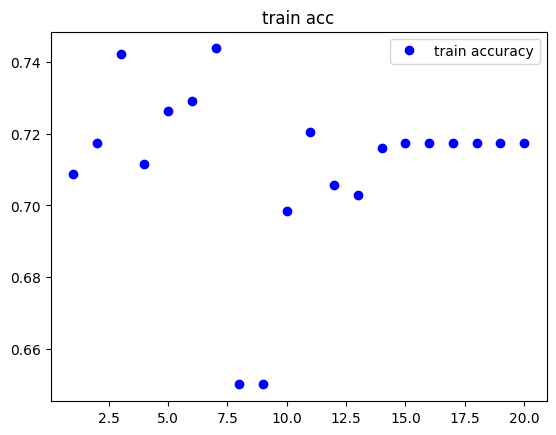

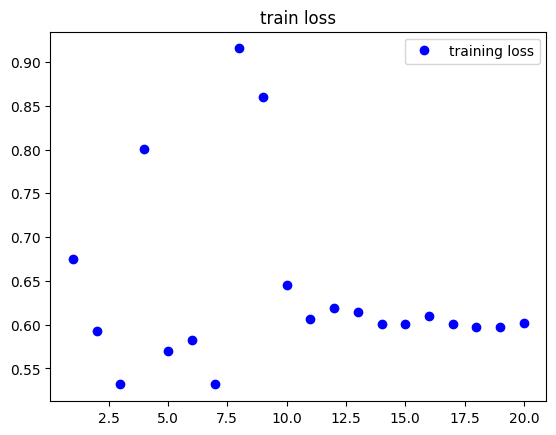

In [ ]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_sequences, test_labels)
print("Precisión del modelo:", accuracy)

8/8 [==============================] - 7s 753ms/step - loss: 0.5767 - acc: 0.7456
Precisión del modelo: 0.7456140518188477


8/8 [==============================] - 6s 780ms/step


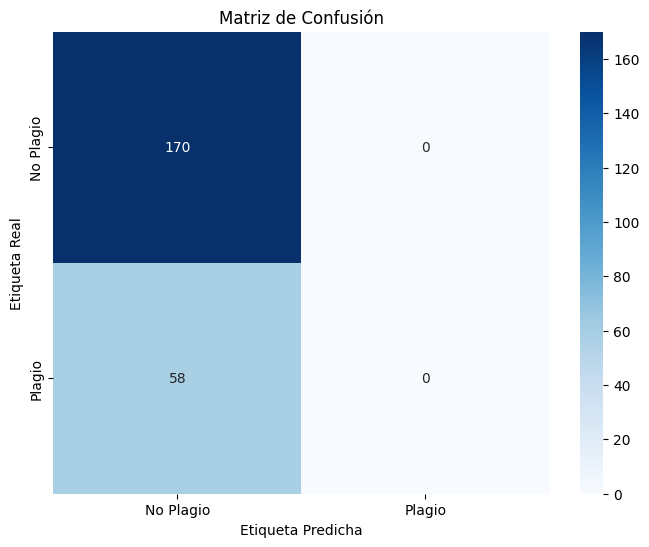

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
labels = ['No Plagio', 'Plagio']
predictions = model.predict(test_sequences)

# Aplicar umbral para convertir las probabilidades en etiquetas binarias
threshold = 0.5  # Umbral para la clasificación binaria
binary_predictions = np.where(predictions >= threshold, 1, 0)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(test_labels, binary_predictions)

# Mostrar la matriz de confusión en un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')

plt.show()